# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

import warnings
warnings.filterwarnings("ignore")

Загрузить датасет по url:


In [3]:
# # следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# # все данные загружаются с сервера
# url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv('world-happiness-report-2019.csv')

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

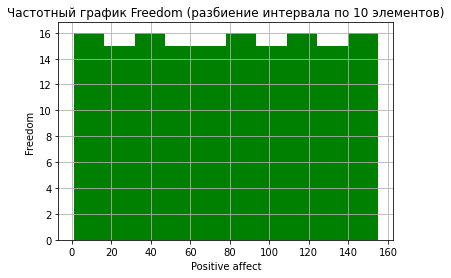

In [19]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

### Получилось равномерное распределение 

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [18]:
# Медиана
statistics.median(df['Freedom'])

71.0

In [51]:
# Мода
statistics.mode(df['Freedom'])

5.0

In [32]:
# Математическое ожидание
statistics.mean(df['Freedom'])

nan

In [38]:
# Элементы с пустым значением
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [5]:
# Поставила 0 вместо nan
df = df.fillna(0)

In [50]:
# Математическое ожидание
statistics.mean(df['Freedom'])

77.5

In [52]:
# Стандартное отклонение
statistics.pstdev(df['Freedom'])

45.032395746469746

In [6]:
# Дисперсия
statistics.pvariance(df['Freedom'])

2027.9166666666667

In [7]:
print('Минимум: ', min(df['Freedom']))
print('Максимум: ', max(df['Freedom']))
print('Размах: ', max(df['Freedom']) - min(df['Freedom']))


Минимум:  0.0
Максимум:  155.0
Размах:  155.0


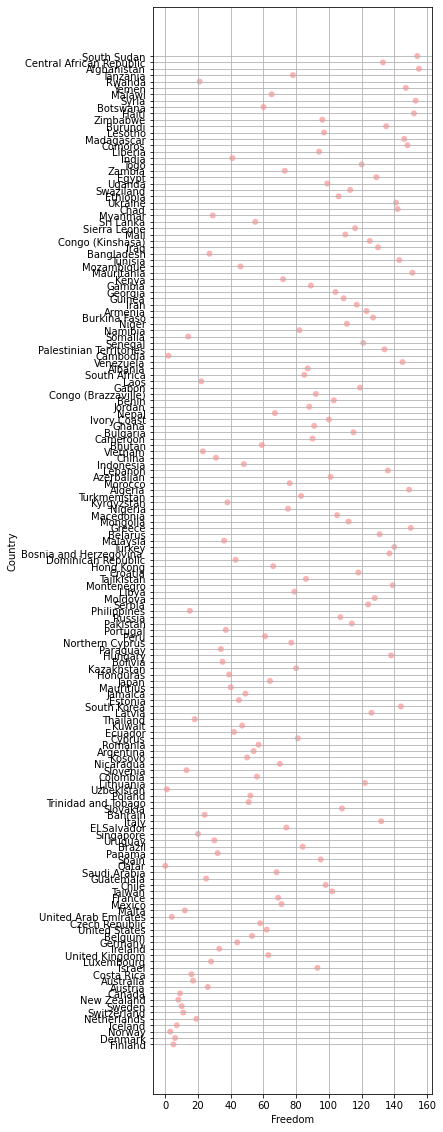

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 20

freedom = df['Freedom']
country = df['Country (region)']
fig, ax = plt.subplots()
ax.scatter(freedom, country, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.show()

### От NAN избавилась раньше, вылетов не наблюдаю

Почему нельзя найти моду?

In [24]:
# Все значения столбца разные, хотя "mode" не выдает ошибку, а выводит значение "5.0"
df['Freedom'].value_counts()

154.0    1
42.0     1
40.0     1
49.0     1
45.0     1
        ..
119.0    1
92.0     1
103.0    1
88.0     1
5.0      1
Name: Freedom, Length: 155, dtype: int64

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

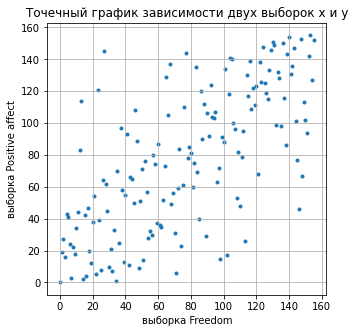

In [16]:
rcParams['figure.figsize'] = 5, 5
freedom = df['Freedom']
p_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, p_affect, marker='.')

### это прямая корреляция

In [18]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, p_affect)
print(corr)

0.6878506740844936


### Знак корреляции говорит, если '+' то корреляцция прямая, '-' обратная

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [19]:
statistics.mean(df['Freedom'])

77.5

In [20]:
# Центрирование
freedom_centr = df['Freedom'] - statistics.mean(df['Freedom'])
print(statistics.mean(freedom_centr))

0.0


### Непонятно, если после центрирования значение 0, надо нормализовать?

In [22]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_centr_norm = min_max_scaler.fit_transform(np.array(freedom_centr).reshape(-1, 1))
print(min(freedom_centr_norm))
print(max(freedom_centr_norm))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

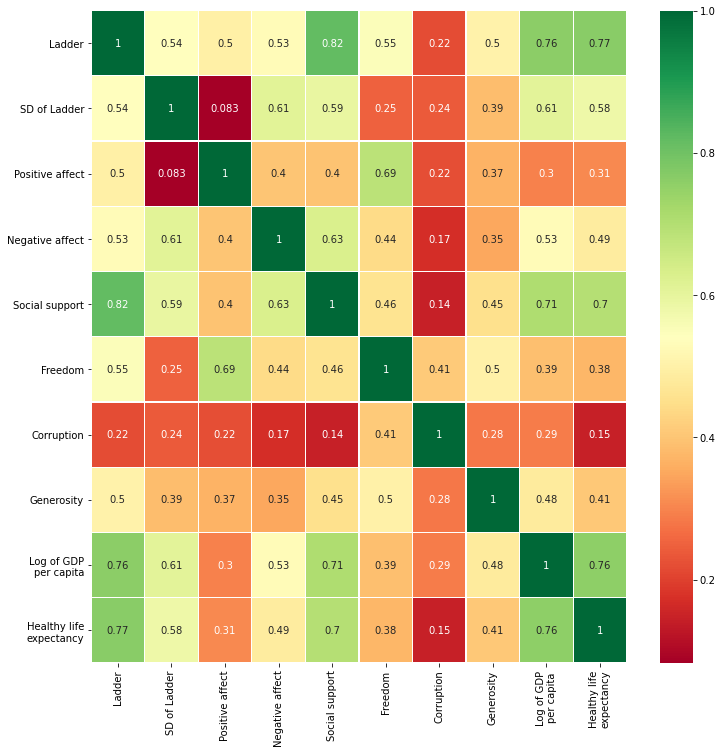

In [23]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


Загрузить таблицу цен на авокадо: 

In [25]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

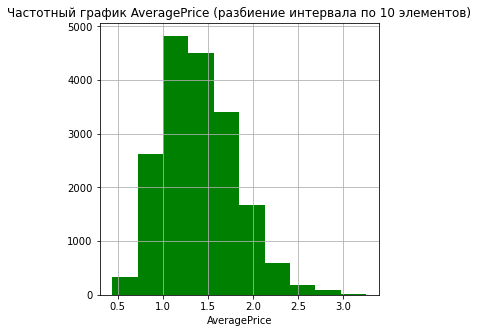

In [29]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

### Нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
4046 - общее количество авокадо с кодом 4046
4225 - общее количество авокадо с кодом 4225
4770 - общее количество авокадо с кодом 4770

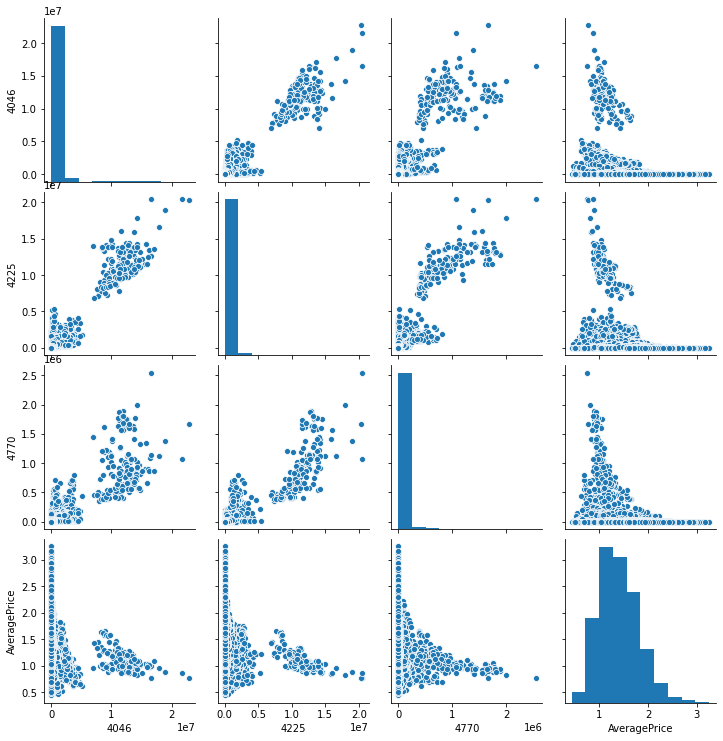

In [30]:
sns_plot = sns.pairplot(
    df[['4046', '4225', '4770', 'AveragePrice']])
sns_plot

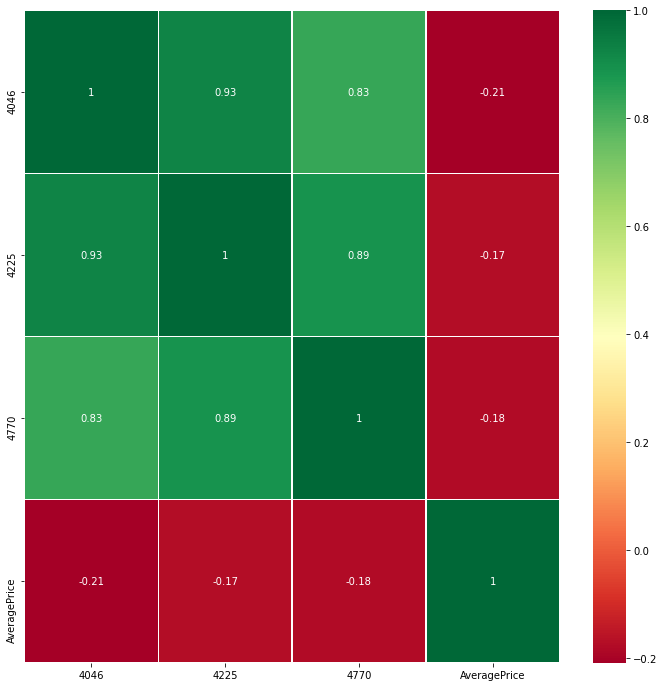

In [31]:
sns.heatmap(df[['4046', '4225', '4770', 'AveragePrice']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

### Обратная корреляция зависимости цены и количества, чем больше цена, тем меньше кол-во авокадо.
### А между авокадо с разными кодами, прямая корреляция. Думаю, это связанно с поддержанием ассортимента